<a href="https://colab.research.google.com/github/hakim-cyber/Comp-Science-for-physics-and-chemistry/blob/main/pw9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving learningDataSetIdeal_5c31962e84a97d1d8d1662830a4a591f.csv to learningDataSetIdeal_5c31962e84a97d1d8d1662830a4a591f.csv
Saving learningDataSetNoisy_a7f04cc2d0a56655421d2738a708e24d.csv to learningDataSetNoisy_a7f04cc2d0a56655421d2738a708e24d.csv
Saving verifDataSetIdeal_30fae47f499afa6c5c29347bebdca9af.csv to verifDataSetIdeal_30fae47f499afa6c5c29347bebdca9af.csv


{'learningDataSetIdeal_5c31962e84a97d1d8d1662830a4a591f.csv': b'5.127286780081560025e+00;7.377688422540055058e+01;0.000000000000000000e+00;0.000000000000000000e+00\r\n6.606211603494790197e+00;7.277346969967722146e+01;0.000000000000000000e+00;0.000000000000000000e+00\r\n8.151211960948167246e+00;3.877932660486686700e+01;0.000000000000000000e+00;0.000000000000000000e+00\r\n6.484344369220361948e+00;4.068772694926303757e+01;0.000000000000000000e+00;0.000000000000000000e+00\r\n5.144749300348259169e+00;3.684933220202545812e+01;0.000000000000000000e+00;0.000000000000000000e+00\r\n6.847473943442942357e+00;3.928287125808674318e+01;0.000000000000000000e+00;0.000000000000000000e+00\r\n6.272985550419382328e+00;6.346110687452478771e+01;1.000000000000000000e+00;1.000000000000000000e+00\r\n6.195813993718816803e+00;4.354469952431165325e+01;0.000000000000000000e+00;0.000000000000000000e+00\r\n6.664497298321063745e+00;7.884405288193410399e+01;0.000000000000000000e+00;0.000000000000000000e+00\r\n6.5165586

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
def load_semicolon(path):
    try:
        return np.loadtxt(path, delimiter=';')
    except:
        return np.loadtxt(path, delimiter=';', skiprows=1)

L_id = load_semicolon("learningDataSetIdeal_5c31962e84a97d1d8d1662830a4a591f.csv")
V_id = load_semicolon("verifDataSetIdeal_30fae47f499afa6c5c29347bebdca9af.csv")
L_no = load_semicolon("learningDataSetNoisy_a7f04cc2d0a56655421d2738a708e24d.csv")

X_L_id, y_L_id = L_id[:,:2], L_id[:,2].astype(int)
X_V_id, y_V_id = V_id[:,:2], V_id[:,2].astype(int)
X_L_no, y_L_no = L_no[:,:2], L_no[:,2].astype(int)

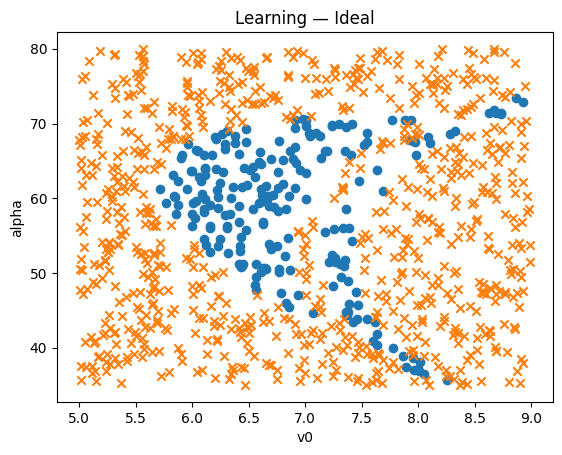

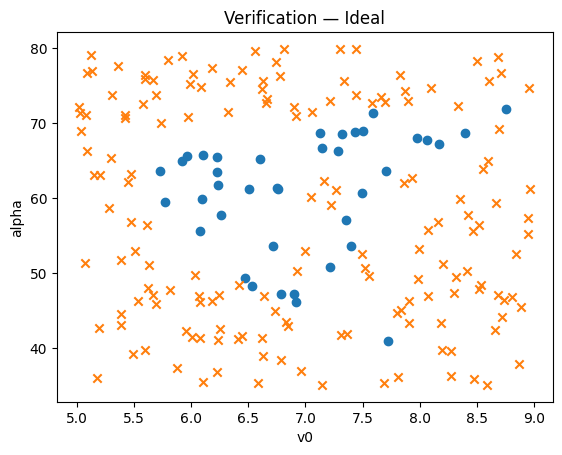

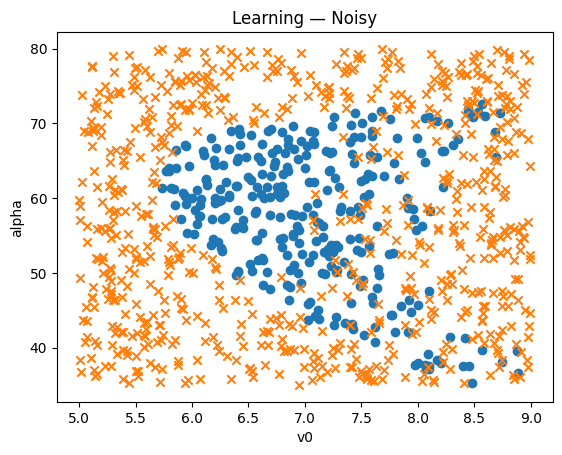

In [ ]:
def scatter_act(X,y,title):
    hit = y==1
    miss = y==0
    plt.figure()
    plt.scatter(X[hit,0], X[hit,1], marker='o')
    plt.scatter(X[miss,0], X[miss,1], marker='x')
    plt.xlabel("v0"); plt.ylabel("alpha"); plt.title(title); plt.show()

scatter_act(X_L_id, y_L_id, "Learning — Ideal")
scatter_act(X_V_id, y_V_id, "Verification — Ideal")
scatter_act(X_L_no, y_L_no, "Learning — Noisy")

In [ ]:
def eval_knn(Xtr,ytr,Xte,yte,k):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(Xtr,ytr)
    ytr_p = clf.predict(Xtr)
    yte_p = clf.predict(Xte)
    cm_tr = confusion_matrix(ytr, ytr_p)
    cm_te = confusion_matrix(yte, yte_p)
    s_tr = accuracy_score(ytr, ytr_p)
    s_te = accuracy_score(yte, yte_p)
    return clf, cm_tr, cm_te, s_tr, s_te, yte_p

for k in [1,3,5,9,15]:
    _, cm_tr, cm_te, s_tr, s_te, _ = eval_knn(X_L_id,y_L_id,X_V_id,y_V_id,k)
    print(f"[Ideal] k={k}  train={s_tr:.3f}  verif={s_te:.3f}")
    print("Confusion train:\n", cm_tr)
    print("Confusion verif:\n", cm_te)

for k in [1,3,5,9,15]:
    _, cm_tr, cm_te, s_tr, s_te, _ = eval_knn(X_L_no,y_L_no,X_V_id,y_V_id,k)
    print(f"[Noisy train → Ideal verif] k={k}  train={s_tr:.3f}  verif={s_te:.3f}")
    print("Confusion train:\n", cm_tr)
    print("Confusion verif:\n", cm_te)

[Ideal] k=1  train=1.000  verif=0.935
Confusion train:
 [[784   0]
 [  0 216]]
Confusion verif:
 [[154   7]
 [  6  33]]
[Ideal] k=3  train=0.950  verif=0.925
Confusion train:
 [[762  22]
 [ 28 188]]
Confusion verif:
 [[156   5]
 [ 10  29]]
[Ideal] k=5  train=0.931  verif=0.910
Confusion train:
 [[753  31]
 [ 38 178]]
Confusion verif:
 [[155   6]
 [ 12  27]]
[Ideal] k=9  train=0.915  verif=0.900
Confusion train:
 [[759  25]
 [ 60 156]]
Confusion verif:
 [[156   5]
 [ 15  24]]
[Ideal] k=15  train=0.902  verif=0.885
Confusion train:
 [[754  30]
 [ 68 148]]
Confusion verif:
 [[155   6]
 [ 17  22]]
[Noisy train → Ideal verif] k=1  train=1.000  verif=0.850
Confusion train:
 [[700   0]
 [  0 300]]
Confusion verif:
 [[140  21]
 [  9  30]]
[Noisy train → Ideal verif] k=3  train=0.932  verif=0.895
Confusion train:
 [[662  38]
 [ 30 270]]
Confusion verif:
 [[149  12]
 [  9  30]]
[Noisy train → Ideal verif] k=5  train=0.913  verif=0.890
Confusion train:
 [[657  43]
 [ 44 256]]
Confusion verif:
 [[

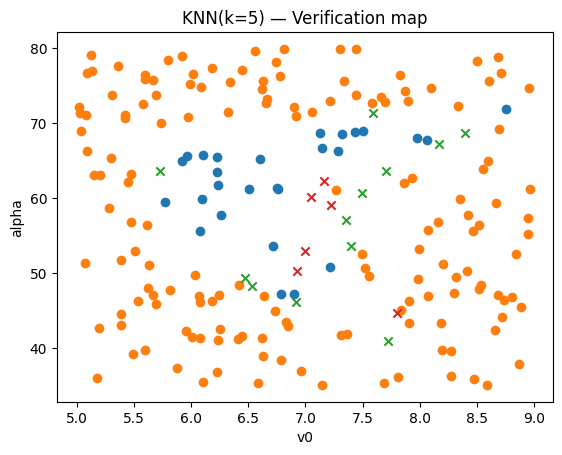

In [ ]:
def result_map(X, y_true, y_pred, title):
    TT = (y_true==1) & (y_pred==1)
    FF = (y_true==0) & (y_pred==0)
    TF = (y_true==1) & (y_pred==0)
    FT = (y_true==0) & (y_pred==1)
    plt.figure()
    plt.scatter(X[TT,0], X[TT,1], marker='o')
    plt.scatter(X[FF,0], X[FF,1], marker='o')
    plt.scatter(X[TF,0], X[TF,1], marker='x')
    plt.scatter(X[FT,0], X[FT,1], marker='x')
    plt.xlabel("v0"); plt.ylabel("alpha"); plt.title(title); plt.show()

clf_id, *_ , yV_pred_id = eval_knn(X_L_id,y_L_id,X_V_id,y_V_id,5)
result_map(X_V_id, y_V_id, yV_pred_id, "KNN(k=5) — Verification map")

DecisionTree [Ideal]  train= 0.906  verif= 0.89
Confusion train:
 [[734  50]
 [ 44 172]]
Confusion verif:
 [[152   9]
 [ 13  26]]


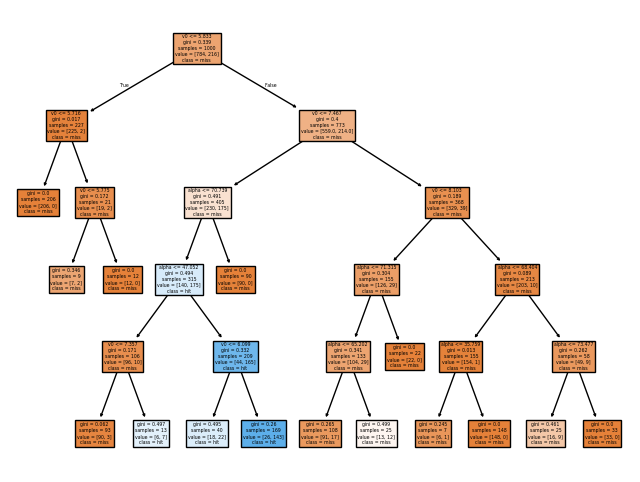

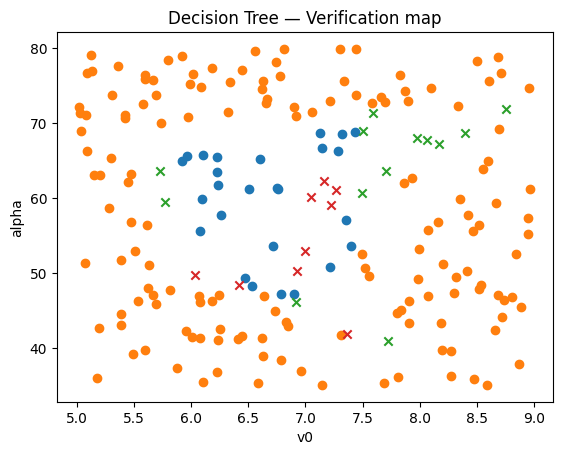

In [ ]:
def eval_tree(Xtr,ytr,Xte,yte,max_depth=None,min_samples_leaf=1):
    clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=0)
    clf.fit(Xtr,ytr)
    ytr_p = clf.predict(Xtr); yte_p = clf.predict(Xte)
    return clf, confusion_matrix(ytr,ytr_p), confusion_matrix(yte,yte_p), accuracy_score(ytr,ytr_p), accuracy_score(yte,yte_p), yte_p

tree, cm_tr, cm_te, s_tr, s_te, y_pred = eval_tree(X_L_id,y_L_id,X_V_id,y_V_id,max_depth=5,min_samples_leaf=5)
print("DecisionTree [Ideal]  train=",s_tr," verif=",s_te)
print("Confusion train:\n",cm_tr)
print("Confusion verif:\n",cm_te)

plt.figure(figsize=(8,6))
plot_tree(tree, feature_names=["v0","alpha"], class_names=["miss","hit"], filled=True)
plt.show()

result_map(X_V_id, y_V_id, y_pred, "Decision Tree — Verification map")

RandomForest(ne=50) [Ideal]  train=0.984  verif=0.925
Confusion train:
 [[783   1]
 [ 15 201]]
Confusion verif:
 [[157   4]
 [ 11  28]]
RandomForest(ne=200) [Ideal]  train=0.982  verif=0.915
Confusion train:
 [[783   1]
 [ 17 199]]
Confusion verif:
 [[157   4]
 [ 13  26]]
RandomForest(ne=500) [Ideal]  train=0.981  verif=0.915
Confusion train:
 [[782   2]
 [ 17 199]]
Confusion verif:
 [[157   4]
 [ 13  26]]


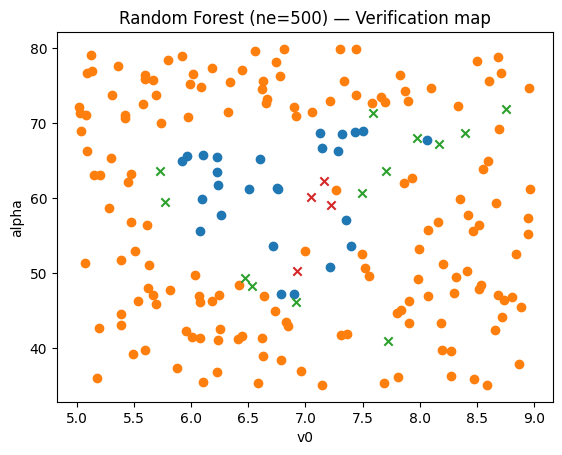

In [ ]:
def eval_rf(Xtr,ytr,Xte,yte,n_estimators=200,max_depth=None,min_samples_leaf=1):
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=0)
    clf.fit(Xtr,ytr)
    ytr_p = clf.predict(Xtr); yte_p = clf.predict(Xte)
    return clf, confusion_matrix(ytr,ytr_p), confusion_matrix(yte,yte_p), accuracy_score(ytr,ytr_p), accuracy_score(yte,yte_p), yte_p

for ne in [50,200,500]:
    rf, cm_tr, cm_te, s_tr, s_te, y_pred = eval_rf(X_L_id,y_L_id,X_V_id,y_V_id,n_estimators=ne,max_depth=None,min_samples_leaf=3)
    print(f"RandomForest(ne={ne}) [Ideal]  train={s_tr:.3f}  verif={s_te:.3f}")
    print("Confusion train:\n",cm_tr)
    print("Confusion verif:\n",cm_te)

result_map(X_V_id, y_V_id, y_pred, f"Random Forest (ne={ne}) — Verification map")

In [ ]:
def quick_scores():
    ks=[1,3,5,9]
    for k in ks:
        _,_,_,s_tr,s_te,_ = eval_knn(X_L_id,y_L_id,X_V_id,y_V_id,k)
        print(f"KNN k={k}: train={s_tr:.3f} verif={s_te:.3f}")
    _,_,_,s_tr,s_te,_ = eval_tree(X_L_id,y_L_id,X_V_id,y_V_id,max_depth=None,min_samples_leaf=1)
    print(f"Tree: train={s_tr:.3f} verif={s_te:.3f}")
    _,_,_,s_tr,s_te,_ = eval_rf(X_L_id,y_L_id,X_V_id,y_V_id,n_estimators=200,max_depth=None,min_samples_leaf=1)
    print(f"RF: train={s_tr:.3f} verif={s_te:.3f}")

quick_scores()

KNN k=1: train=1.000 verif=0.935
KNN k=3: train=0.950 verif=0.925
KNN k=5: train=0.931 verif=0.910
KNN k=9: train=0.915 verif=0.900
Tree: train=1.000 verif=0.945
RF: train=1.000 verif=0.940
